In [1]:
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
from joblib import load
import pickle
import warnings
from sklearn.exceptions import InconsistentVersionWarning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

In [2]:
# data = np.load('../../Data/#1/processed_data.npz')
# x_tr_resample = data['x_tr_resample']
# y_tr_resample = data['y_tr_resample']
# X_test = data['X_test']
# y_test = data['y_test']
# X_train = data['X_train']

x_tr_resample = pd.read_csv('../../Data/sequential/n=7/X_train_smote.csv')
y_tr_resample = pd.read_csv('../../Data/sequential/n=7/y_train_smote.csv')
X_test = pd.read_csv('../../Data/sequential/n=7/X_test.csv')
y_test = pd.read_csv('../../Data/sequential/n=7/y_test.csv')
# X_train = pd.read_csv('../../Data/#1/X_train.csv')

# with open('../../Data/#1/power_transformer.pkl', 'rb') as f:
#     norm = pickle.load(f)

norm = load('../../Data/#1/power_transformer.joblib')


# norm_train_feature = norm.fit_transform(X_train)
# norm_test_feature = norm.transform(X_test)

In [3]:
# Mengganti spasi dalam nama kolom dengan garis bawah
x_tr_resample.columns = x_tr_resample.columns.str.replace(' ', '_')
y_tr_resample.columns = y_tr_resample.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')
y_test.columns = y_test.columns.str.replace(' ', '_')

y_tr_resample = y_tr_resample.values.ravel()
y_test = y_test.values.ravel()


In [4]:
X_test.columns

Index(['Time_Diff_between_first_and_last_(Mins)',
       'Unique_Received_From_Addresses', '_Total_ERC20_tnxs',
       '_ERC20_uniq_sent_addr', '_ERC20_min_val_rec',
       '_ERC20_uniq_sent_token_name', '_ERC20_most_sent_token_type_hashed_2'],
      dtype='object')

In [5]:
model = LGBMClassifier()

In [6]:
model.fit(x_tr_resample, y_tr_resample)

[LightGBM] [Info] Number of positive: 6120, number of negative: 6120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 12240, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [7]:
y_pred = model.predict(X_test)

Accuracy: 98.93%
Precision: 97.65%
Recall: 97.42%
F1 Score: 97.54%


<Axes: >

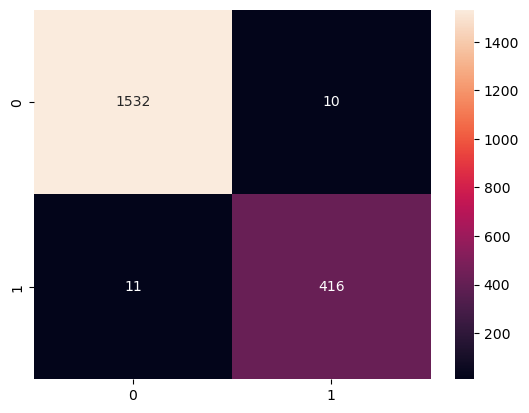

In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

sns.heatmap(conf_matrix, annot=True, fmt='d')